# EEG Classification Using Deep Learning

### Step 1: Import Necessary Libraries

In [210]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split,GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

### Step 2: Load the Dataset

In [211]:
# Load the dataset
data_path = "eeg_training_data_with_subjects.csv"
#data_path = "/Users/ishabharti/eeg_training_data_with_subjects.csv"

data = pd.read_csv(data_path)
data.head()

,delta,theta,alpha,beta,gamma,mean,variance,skewness,kurtosis,line_length,label,subject_id
0,0.000123,0.000067,1.039174e-05,4.101177e-07,1.740069e-07,-0.000003,2.089062e-08,-1.763948,2.470575,0.004479,0,sub-001
1,0.000208,0.000085,9.628139e-07,2.513081e-07,1.123781e-07,0.000125,4.599112e-08,0.497322,-1.170764,0.003333,0,sub-001
2,0.000917,0.000410,3.276360e-05,4.333310e-06,3.227772e-07,0.000167,1.393151e-07,0.577952,-0.144130,0.005464,0,sub-001
3,0.000069,0.000030,1.999117e-06,3.742573e-07,1.669777e-07,-0.000084,1.022358e-08,0.009396,-1.516320,0.003864,0,sub-001
4,0.000231,0.000103,7.266782e-06,3.089532e-06,2.499983e-07,0.000274,4.820566e-08,-0.132097,-0.538502,0.004247,0,sub-001


### Step 3: Prepare Features and Labels

In [212]:
X = data[['delta', 'theta', 'alpha', 'beta', 'gamma', 'mean', 'variance', 'skewness', 'kurtosis', 'line_length']]
y = data['label']

### Step 4: Normalize the Features

In [213]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 5: Split the Dataset

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Step 6: Build a Deep Learning Model

In [215]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [216]:
model = Sequential([
    Dense(216, activation = 'tanh', input_shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dropout(0.2),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid')
])


#model = Sequential([
    #Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    #Dropout(0.4),
    #Dense(64, activation='relu'),
    #Dropout(0.3),
    #Dense(32, activation='relu'),
    #Dropout(0.2),
    #Dense(1, activation='sigmoid')
#])

In [217]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adamax, Nadam


### Step 7: Compile the Model

In [218]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

### Step 8: Train the Model

In [219]:
history = model.fit(X_train, y_train, epochs=140, batch_size=256, validation_split=0.2, verbose=1)
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/140
111/111 [==============================] - 1s 3ms/step - loss: 0.6158 - accuracy: 0.6632 - val_loss: 0.6046 - val_accuracy: 0.6663
Epoch 2/140
111/111 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.6684 - val_loss: 0.6074 - val_accuracy: 0.6657
Epoch 3/140
111/111 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.6735 - val_loss: 0.5960 - val_accuracy: 0.6757
Epoch 4/140
111/111 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6777 - val_loss: 0.5978 - val_accuracy: 0.6749
Epoch 5/140
111/111 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.6797 - val_loss: 0.5946 - val_accuracy: 0.6753
Epoch 6/140
111/111 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.6855 - val_loss: 0.5848 - val_accuracy: 0.6802
Epoch 7/140
111/111 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.6837 - val_loss: 0.5895 - val_accuracy: 0.6800

### Step 9: Visualize Training and Validation Performance

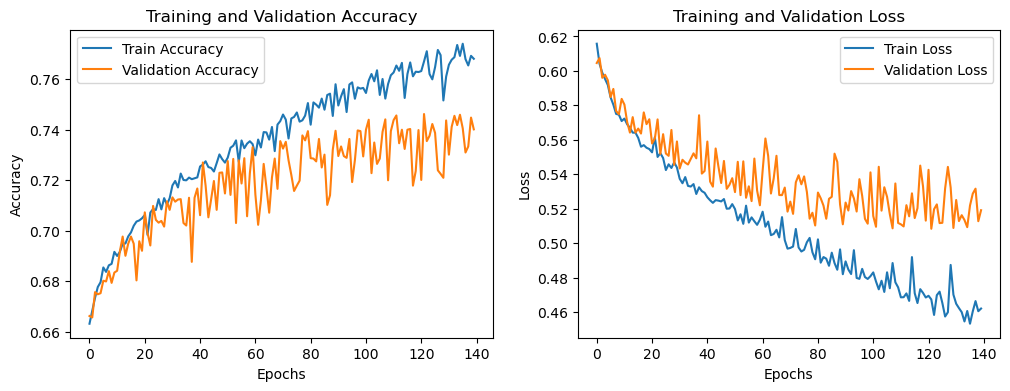

In [220]:


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Step 10: Evaluate the Model

In [221]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

278/278 [==============================] - 0s 369us/step
Accuracy: 0.74149199909849
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81      5647
           1       0.71      0.48      0.58      3227

    accuracy                           0.74      8874
   macro avg       0.73      0.69      0.70      8874
weighted avg       0.74      0.74      0.73      8874



### Step 11: Save the Model

In [222]:
model.save('eeg_classification_model.h5')

In [223]:
def preprocess_single_eeg(raw_eeg_data, band_ranges):
    """
    Preprocess a single EEG dataset and extract features.

    Parameters:
        raw_eeg_data: Raw EEG data object (e.g., mne.io.Raw)
        band_ranges: Dictionary of frequency band ranges
    
    Returns:
        feature_array: A numpy array of extracted features
    """
    # Preprocess the EEG data
    raw_eeg_data.filter(1., 40., fir_design='firwin')

    # Define epochs
    events, event_id = mne.events_from_annotations(raw_eeg_data)
    tmin, tmax = -0.2, 0.5
    epochs = mne.Epochs(raw_eeg_data, events, event_id, tmin=tmin, tmax=tmax, baseline=(None, 0), preload=True)

    # Compute PSD for the entire frequency range
    psd = epochs.compute_psd(method='multitaper', fmin=0.5, fmax=40)
    psd_data = psd.get_data()  # Shape: (n_epochs, n_channels, n_freqs)
    freqs = psd.freqs

    # Compute features for each frequency band
    band_powers = []
    for fmin, fmax in band_ranges.values():
        band_indices = (freqs >= fmin) & (freqs < fmax)
        band_power = psd_data[:, :, band_indices].mean(axis=(1, 2))  # Aggregate across channels and frequencies
        band_powers.append(band_power.mean())  # Average over epochs

    # Compute additional features
    epoch_data = epochs.get_data().mean(axis=1)  # Aggregate across channels
    mean_values = epoch_data.mean()
    var_values = epoch_data.var()
    skew_values = skew(epoch_data, axis=1).mean()
    kurtosis_values = kurtosis(epoch_data, axis=1).mean()
    line_length = np.sum(np.abs(np.diff(epoch_data, axis=1)), axis=1).mean()

    # Combine all features
    feature_array = np.array([
        *band_powers, mean_values, var_values, skew_values, kurtosis_values, line_length
    ])
    return feature_array

In [224]:
import mne
import os

# Define the dataset directory
data_dir = "./ds003523"

# Subject and session information
subject = "sub-001"
session = "ses-01"

# Construct the path to the EEG file
eeg_file_path = os.path.join(
    data_dir,
    subject,
    session,
    "eeg",
    f"{subject}_{session}_task-VisualWorkingMemory_eeg.set"
)

# Check if the file exists
if not os.path.exists(eeg_file_path):
    print(f"EEG file not found: {eeg_file_path}")
else:
    print(f"EEG file found: {eeg_file_path}")

EEG file found: ./ds003523/sub-001/ses-01/eeg/sub-001_ses-01_task-VisualWorkingMemory_eeg.set


In [225]:
raw = mne.io.read_raw_eeglab(eeg_file_path, preload=True)
# Plot the raw data (optional)
# raw.plot(duration=5, n_channels=30)

Reading /Users/ishabharti/EEG Project/ds003523/sub-001/ses-01/eeg/sub-001_ses-01_task-VisualWorkingMemory_eeg.fdt
Reading 0 ... 697174  =      0.000 ...  1394.348 secs...


/var/folders/dl/zd_s8q0x20zbxpy0_dzhksbh0000gn/T/ipykernel_69725/1947841769.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file_path, preload=True)


In [226]:
import os
import mne
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from mne.time_frequency import psd_array_multitaper
import joblib


# Define the band ranges used during training
band_ranges = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 100)
}
  
# Preprocess and extract features for the single EEG sample
single_features = preprocess_single_eeg(raw, band_ranges)

# Reshape to match the input format expected by the model (1 sample, n_features)
single_features = single_features.reshape(1, -1)
single_features

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Used Annotations descriptions: ['S  1', 'S  2', 'S  3', 'S 50', 'S 51', 'S 52', 'S100', 'S101', 'S200', 'S201', 'boundary']
Not setting metadata
511 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 511 events and 351 original time points ...
1 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


array([[ 3.19355231e-04,  1.44500796e-04,  1.04500588e-05,
         1.89622193e-06,  5.15565377e-07, -2.47271096e-05,
         9.23275691e-08, -9.91062469e-01,  1.81069777e+00,
         2.58580155e-03]])

In [227]:
import joblib
import numpy as np

model_path = "random_forest_model.pkl"
# Load the trained Random Forest model
try:
    model = joblib.load(model_path)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Model file not found at: {model_path}")
    raise

Model loaded successfully!


In [228]:
# Predict the class
predicted_class = model.predict(single_features)[0]

# Predict the probability of each class
predicted_probabilities = model.predict_proba(single_features)[0]

print(f"Predicted Class: {predicted_class}")
print(f"Predicted Probabilities: {predicted_probabilities}")

Predicted Class: 0
Predicted Probabilities: [0.81 0.19]


/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
